
<img src="https://raw.githubusercontent.com/PinkWink/DataScience/master/img/title.jpg" width="200" height="200"><br>


# 1장 - 서울시 구별 CCTV 현황 분석



## 1-1 CCTV 현황과 인구 현황 데이터 구하기


서울시의 CCTV 현황은 구글 검색만으로도 쉽게 구할 수 있다. '서울시 자치구 연도별 CCTV 설치 현황'을 검색하면 '서울 열린데이터 광장' 사이트의 해당 페이지로 갈 수 있다. csv 파일은 콤마로 구분된 파일이다. 우리나라에서는 잘 통용되지 않지만 외국 자료를 검색하다 보면 자주 나타난다. 텍스트 파일이기 때문에 메모장에서도 열린다. 그런데 만약 csv 파일에 한글이 UTF-8로 인코딩되어 있다면 엑셀에서 열었을때 한글이 깨져 보일 수 있다.
나는 위 책의 나와있는 github에서 data를 다운 받았다.

(데이터 출처: https://github.com/PinkWink/DataScience)



## 1-2  파이썬에서 텍스트 파일과 엑셀 파일 읽기 - pandas


앞서 얻은 파일을 읽어와야 한다. 파이썬에서는 이런 종류의 파일을 아주 손쉽게 읽을 수 있는 모듈이 있다. 바로 pandas 이다. 





In [44]:
import pandas as pd

앞으로도 위 코드와 같이 대부분의 시작은 import로 하게 될 것이다. 파이썬에서 원하는 모듈을 불러오는 명령이 import 이다. 모듈명 다음의 as는 as 뒤에 붙는 pd라는 짧은 단어로 pandas를 대체한다는 뜻이다.
pandas에서 csv파일을 읽는 명령은 read_csv 이다. 그 안에 한글을 사용하는 경우는 인코딩에 신경 써야 한다. 우리가 받은 cctv 데이터는 UTF-8로 인코딩 되어 있어서 read_csv 명령을 쓸 때 encoding 옵션에 UTF-8 이라고 지정한다.

In [45]:
# CCTV_Seoul = pd.read_csv('C:/Users/이재윤/DataScience/data/01. CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul = pd.read_csv('../DataScience/data/01. CCTV_in_Seoul.csv', encoding='utf-8')

CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


pandas 데이터는 제일 첫 줄에 보이는 것이 해당하는 열(column)을 대표하는 일종의 제목이다. 그래서 첫 줄을 column 이라고 한다. 데이터 뒤에 columns 라고 하면 column의 이름들이 반환된다.

In [46]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [47]:
CCTV_Seoul.columns[0]

'기관명'

기관명이라고 되어 있어 이를 '구별' 이라는 이름으로 하자. 이렇게 이름을 바꾸는 명령은 rename 이라고 한다.

In [48]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


이번엔 두 번째 받은 엑셀 파일을 읽어야 한다. 그 명령은 read_excel이다. 그냥 인코딩만 지정하고 읽었더니 약간 이상하다. 그것은 원본 엑셀 파일이 아래에서 보이는 것처럼 첫 세 줄이 열의 제목처럼 되어 있기 때문이다.

In [49]:
# pop_Seoul = pd.read_excel('C:/Users/이재윤/DataScience/data/01. population_in_Seoul.xls')
pop_Seoul = pd.read_excel('../DataScience/data/01. population_in_Seoul.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


그리고 엑셀파일을 읽을 때는 옵션을 좀 더 많이 적용해 보자. 일단 엑셀을 읽는 read_excel 명령 안에서 세 번째 줄부터 읽으라는 header=2 라는 옵션을 걸고, B,D,G,J,N 열만 읽도록 usecols='B,D,G,J,N' 이라는 옵션을 넣었다.

In [50]:
#pop_Seoul = pd.read_excel('C:/Users/이재윤/DataScience/data/01. population_in_Seoul.xls',header =2,
#                         usecols = 'B,D,G,J,N',
#                         )
pop_Seoul = pd.read_excel('../DataScience/data/01. population_in_Seoul.xls',header =2,
                         usecols = 'B,D,G,J,N',
                         )

pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


출력된 모습도 간결하게 되었다. 하지만 컬럼의 이름에 문제가 있는거 같아 rename 명령을 사용해서 컬럼의 이름을 변경한다.

In [51]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                         pop_Seoul.columns[1] : '인구수',
                         pop_Seoul.columns[2] : '한국인',
                         pop_Seoul.columns[3] : '외국인',
                         pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


이제 어느정도 정돈된 모습이다. CCTV_Seoul 이라는 변수에는 '구별 CCTV 현황'을 pop_Seoul 이라는 변수에는 '구별 인구 현황'을 저장했다.
pandas 에서 몇줄 입력하지 않았는데 우리는 두 종류의 파일을 보기 좋게 읽었다.


## 1-3 pandas 기초 익히기


이 절의 튜토리얼에서는 pandas의 기초 튜토리얼을 익히고 지나가자.

In [52]:
import pandas as pd
import numpy as np

pandas 와 numpy 를 import 했다. 이 두 모듈은 자주 사용하는 모듈이면서 함께 쓰면 유용하다.

In [53]:
s= pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

pandas의 데이터 유형 중 기초가 되는 것이 Series 이다. 대괄호로 만드는 파이썬의 list데이터로 만들 수 있다.

In [54]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

또 pandas 에는 날짜형의 데이터인 date_range가 있다. 기본 날짜를 지정하고 periods 옵션으로 6일간이라고 지정한다.

In [55]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A','B','C','D'])

df

,A,B,C,D
2013-01-01,-0.641021,0.043976,-0.785173,0.718623
2013-01-02,-0.561486,0.525190,1.697584,0.364972
2013-01-03,0.917479,0.007566,-0.435957,0.048986
2013-01-04,0.913555,0.769320,-2.379704,-0.327822
2013-01-05,-0.683930,0.348136,-0.079093,0.547910
2013-01-06,-1.151213,0.356788,-0.330865,-0.804399


이제 DataFrame 유형의 데이터를 만든다. 6행 4열의 random 변수를 만들고, 컬럼에서 위와같이 A,B,C,D 로 지정하고 index 명령으로 전 단계에서 만든 날짜형 데이터인 dates를 index=dates 옵션을 이용해서 지정했다.

In [56]:
df.head(3)

,A,B,C,D
2013-01-01,-0.641021,0.043976,-0.785173,0.718623
2013-01-02,-0.561486,0.525190,1.697584,0.364972
2013-01-03,0.917479,0.007566,-0.435957,0.048986


head() 명령을 사용하면 기본적으로 첫 5행을 보여준다. 괄호 안에 숫자를 넣으면 그 숫자만큼의 행을 볼 수 있다.

In [57]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [58]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

그리고 index, columns 명령을 이용하면 pandas의 DataFrame의 컬럼과 인덱스를 확인할 수 있다.

In [59]:
df.values

array([[-0.64102123,  0.04397627, -0.78517298,  0.71862311],
       [-0.56148635,  0.52518978,  1.69758358,  0.36497195],
       [ 0.91747898,  0.00756567, -0.43595721,  0.04898558],
       [ 0.91355527,  0.76932026, -2.37970422, -0.32782222],
       [-0.68393004,  0.34813564, -0.07909349,  0.54790955],
       [-1.15121323,  0.35678819, -0.33086488, -0.80439886]])

그리고 그 안에 들어가는 내용은 values 명령으로 확인할 수 있다. 그리고 info() 명령을 사용하면 DataFrame의 개요를 알 수 있다.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


describe() 명령을 사용하면 통계적 개요를 확인할 수 있다. 아래처럼 평균과 개수, min, max, 표준편차까지 알 수 있다.

In [61]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.201103,0.341829,-0.385535,0.091378
std,0.889148,0.288819,1.309599,0.575613
min,-1.151213,0.007566,-2.379704,-0.804399
25%,-0.673203,0.120016,-0.697869,-0.233620
50%,-0.601254,0.352462,-0.383411,0.206979
75%,0.544795,0.483089,-0.142036,0.502175
max,0.917479,0.769320,1.697584,0.718623


이때 values가 숫자가 아니라 문자라고 하더라도 그에 맞는 개요가 나타난다.

In [62]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-04,0.913555,0.769320,-2.379704,-0.327822
2013-01-02,-0.561486,0.525190,1.697584,0.364972
2013-01-06,-1.151213,0.356788,-0.330865,-0.804399
2013-01-05,-0.683930,0.348136,-0.079093,0.547910
2013-01-01,-0.641021,0.043976,-0.785173,0.718623
2013-01-03,0.917479,0.007566,-0.435957,0.048986


sort_values 명령은 by로 지정된 컬럼을 기준으로 정렬한다. ascending 옵션을 사용하면 내림차순이나 오름차순으로 정렬시킬 수 있다.

In [63]:
df

,A,B,C,D
2013-01-01,-0.641021,0.043976,-0.785173,0.718623
2013-01-02,-0.561486,0.525190,1.697584,0.364972
2013-01-03,0.917479,0.007566,-0.435957,0.048986
2013-01-04,0.913555,0.769320,-2.379704,-0.327822
2013-01-05,-0.683930,0.348136,-0.079093,0.547910
2013-01-06,-1.151213,0.356788,-0.330865,-0.804399


그냥 변수명을 적고 실행 하면 그 내용이 나타난다. 너무 많으면 jupyter notebook 에서 내용을 줄인다.

In [64]:
df['A']

2013-01-01   -0.641021
2013-01-02   -0.561486
2013-01-03    0.917479
2013-01-04    0.913555
2013-01-05   -0.683930
2013-01-06   -1.151213
Freq: D, Name: A, dtype: float64

DataFrame으로 선언된 변수의 경우 변수명 뒤에 ['A']와 같이 붙여주면 해당 컬럼만 Series로 보여준다. 중간부터 보고싶다면 df[0:3]이라고 하면 된다.

In [65]:
df[0:3]

,A,B,C,D
2013-01-01,-0.641021,0.043976,-0.785173,0.718623
2013-01-02,-0.561486,0.525190,1.697584,0.364972
2013-01-03,0.917479,0.007566,-0.435957,0.048986


만약 2013.01.02 부터 2013.01.04 까지의 행을 보고 싶다면 아래과 같이 하면 된다.

In [66]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.561486,0.525190,1.697584,0.364972
2013-01-03,0.917479,0.007566,-0.435957,0.048986
2013-01-04,0.913555,0.769320,-2.379704,-0.327822


앞에서 만든 dates 변수를 이용해 특정 날짜의 데이터만 보고 싶으면 df.loc 명령을 사용하면 된다. loc는 location 옵션으로 슬라이싱 할 때 loc 옵션을 이용해서 위치 값을 지정할 수 있다.

In [67]:
df.loc[dates[0]]

A   -0.641021
B    0.043976
C   -0.785173
D    0.718623
Name: 2013-01-01 00:00:00, dtype: float64

A,B 열의 모든 행을 보고싶으면 df.loc['A','B']라고 하면 된다.

In [68]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.641021,0.043976
2013-01-02,-0.561486,0.525190
2013-01-03,0.917479,0.007566
2013-01-04,0.913555,0.769320
2013-01-05,-0.683930,0.348136
2013-01-06,-1.151213,0.356788


물론 행과 열의 범위를 모두 지정할 수 있다.

In [69]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.561486,0.525190
2013-01-03,0.917479,0.007566
2013-01-04,0.913555,0.769320


In [70]:
df.loc['20130102',['A','B']]

A   -0.561486
B    0.525190
Name: 2013-01-02 00:00:00, dtype: float64

In [71]:
df.loc[dates[0],'A']

-0.6410212301687743

하지만 loc 명령과 달리 행과 열의 번호를 이용해서 데이터에 바로 접근할 때 쓰는 명령어가 iloc 입니다. iloc을 사용하면 행이나 열의 범위를 지정하면 된다. 특히 콜론(:)을 사용하면 전체를 의미한다.

In [72]:
df.iloc[3]

A    0.913555
B    0.769320
C   -2.379704
D   -0.327822
Name: 2013-01-04 00:00:00, dtype: float64

먼저 iloc에 단지 숫자만 표시하면 3번행(0번부터시작) 즉 4번째 행이 나온다.

In [73]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.913555,0.769320
2013-01-05,-0.683930,0.348136


또 위처럼 3번째부터 5번째 앞, 즉 3번째부터 4번째까지 행과 0번부터 1번까지 열의 데이터만 가져올 수 있다.

In [74]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.561486,1.697584
2013-01-03,0.917479,-0.435957
2013-01-05,-0.683930,-0.079093


또 범위가 아니라 콤마로 행이나 열을 지정해서 데이터를 위처럼 가져올 수 있다. 행이나 열에 대해 한쪽은 전체를 의미하게 하고 싶을때는 그냥 콜론만 사용하면 된다.

In [75]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.561486,0.525190,1.697584,0.364972
2013-01-03,0.917479,0.007566,-0.435957,0.048986


In [76]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.043976,-0.785173
2013-01-02,0.525190,1.697584
2013-01-03,0.007566,-0.435957
2013-01-04,0.769320,-2.379704
2013-01-05,0.348136,-0.079093
2013-01-06,0.356788,-0.330865


반대로 행을 전체로 선택했다. 다시 df를 호출하자.

In [77]:
df

,A,B,C,D
2013-01-01,-0.641021,0.043976,-0.785173,0.718623
2013-01-02,-0.561486,0.525190,1.697584,0.364972
2013-01-03,0.917479,0.007566,-0.435957,0.048986
2013-01-04,0.913555,0.769320,-2.379704,-0.327822
2013-01-05,-0.683930,0.348136,-0.079093,0.547910
2013-01-06,-1.151213,0.356788,-0.330865,-0.804399


DataFrame에서 특정 조건을 만족하는 데이터만 얻을 수 있다. 컬럼을 지정할 때 df['A']처럼 할 수도 있고, df.A와 같이 할 수도 있다. 컬럼 A에서 0보다 큰 행만 얻는 것이다.

In [78]:
df[df.A>0]

,A,B,C,D
2013-01-03,0.917479,0.007566,-0.435957,0.048986
2013-01-04,0.913555,0.769320,-2.379704,-0.327822


데이터 전체에서 조건을 걸면 만족하지 않은 곳은 NaN 처리가 된다.

In [79]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,0.043976,NaN,0.718623
2013-01-02,NaN,0.525190,1.697584,0.364972
2013-01-03,0.917479,0.007566,NaN,0.048986
2013-01-04,0.913555,0.769320,NaN,NaN
2013-01-05,NaN,0.348136,NaN,0.547910
2013-01-06,NaN,0.356788,NaN,NaN


DataFrame을 복사할 때는 그냥 = 기호를 이용해서 복사하면 실제 데이터의 내용이 복사되는 것이 아니라 데이터 위치만 복사되기 때문에 원본 데이터는 하나만 있게된다. 데이터 내용까지 복사하라는 지령은 copy() 옵션을 붙이면 된다.

In [80]:
df2 = df.copy()

In [81]:
df2['E'] = ['one','one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.641021,0.043976,-0.785173,0.718623,one
2013-01-02,-0.561486,0.525190,1.697584,0.364972,one
2013-01-03,0.917479,0.007566,-0.435957,0.048986,two
2013-01-04,0.913555,0.769320,-2.379704,-0.327822,three
2013-01-05,-0.683930,0.348136,-0.079093,0.547910,four
2013-01-06,-1.151213,0.356788,-0.330865,-0.804399,three


원래 있는 DataFrame 에서 새로운 컬럼을 추가하는 것은 위처럼 하면 된다.

In [82]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

위에서 만든 E 컬럼에서 two와 four 가 있는지 조건을 걸고 싶을땐 isin 명령을 쓰면 된다.

In [83]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.917479,0.007566,-0.435957,0.048986,two
2013-01-05,-0.683930,0.348136,-0.079093,0.547910,four


그 결과는 True/False로 반환되는데, 이것을 이용하면 조건에 맞는 데이터를 선택할 수 있다.

In [84]:
df

,A,B,C,D
2013-01-01,-0.641021,0.043976,-0.785173,0.718623
2013-01-02,-0.561486,0.525190,1.697584,0.364972
2013-01-03,0.917479,0.007566,-0.435957,0.048986
2013-01-04,0.913555,0.769320,-2.379704,-0.327822
2013-01-05,-0.683930,0.348136,-0.079093,0.547910
2013-01-06,-1.151213,0.356788,-0.330865,-0.804399


df 변수에서 좀 더 통계 느낌의 데이터를 볼 때는 특정 함수를 적용시키면 좋다. 이때 사용하는 것이 apply 명령이다. 누적합을 알고 싶을 때는 numpy의 cumsum을 이용하면 된다.

In [85]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-0.641021,0.043976,-0.785173,0.718623
2013-01-02,-1.202508,0.569166,0.912411,1.083595
2013-01-03,-0.285029,0.576732,0.476453,1.132581
2013-01-04,0.628527,1.346052,-1.903251,0.804758
2013-01-05,-0.055403,1.694188,-1.982344,1.352668
2013-01-06,-1.206617,2.050976,-2.313209,0.548269


특별히 최대값과 최소값의 차이를 알고 싶다면 one-line 함수인 lambda를 이용할 수 도 있다.

In [86]:
df.apply(lambda x: x.max() - x.min())

A    2.068692
B    0.761755
C    4.077288
D    1.523022
dtype: float64

## 1-4 pandas 이용해서 CCTV와 인구현황 데이터 파악하기


이제 기초가 되는 pandas도 익혔으니 두 데이터를 정리해 보자.

In [87]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


구별 CCTV 데이터에서 CCTV 전체 개수인 소계로 정렬하자.

In [88]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


CCTV의 전체 개수가 가장 작은 구는 도봉구, 마포구, 송파구, 중랑구, 중구 라는 것을 알 수 있다. 의아한 것은 강남 3구 중 하나인 송파구가 CCTV가 가장 적은 구 중 하나라는 건데 앞에서 보면 송파구는 범죄율이 결코 낮은 구가 아니다. 그런데 CCTV가 적은 구 중에 하나이다.

In [89]:
CCTV_Seoul.sort_values(by = '소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


그리고 CCTV가 가장 많은 구는 강남구, 양천구, 서초구, 은평구, 용산구로 나타난다. 특히 2014년 부터 2016년 까지 최근 3년간 CCTV 수를 더하고 2013년 이전 CCTV 수로 나눠서 최근 3년간 CCTV 증가율을 계산하자.

In [90]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] *100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


그 결과를 보면 최근 3년간 CCTV가 그 이전 대비 많이 증가한 구는 종로구, 도봉구, 마포구, 노원구, 강동구 라는 것을 알 수 있다. 이제 서울시 인구 현황을 정리해 보자.


In [91]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


먼저 pop_Seoul 변수를 확인 했더니 0번 행에 합계가 보인다. 이것은 우리에게 필요가 없다. 이럴 때는 drop 명령을 사용해서 지우자.


In [92]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


그리고 pop_Seoul 데이터의 '구별' 컬럼의 unique를 조사하자. 유니크 조사는 반복된 데이터는 하나로 나타내서 한 번 이상 나타난 데이터를 확인하는 것이다.

In [93]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

이렇게 유니크 조사를 했더니 제일 끝에 Nan이 보인다. NaN이 어디에 있는지 확인하기 위해서는 조건문을 사용해야 한다. isnull 명령으로 NaN 데이터를 추출할 수 있다. 

In [94]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


행을 지우는 drop 명령으로 NaN 이 있던 행을 삭제하자.

In [95]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


이제 각 구별 전체 인구를 이용해서 구별 외국인비율과 고령자비율을 계산해보자.


In [96]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


인구수로 정렬했더니 송파구, 강서구, 강남구, 노원구, 관악구 순으로 인구가 많다.

In [97]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [98]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [99]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


외국인 숫자가 많은구는 영등포구, 구로구, 금천구, 관악구, 동대문구 이지만 외국인 비율이 높은 구는 영등포, 금천구, 구로구, 중구, 용산구로 조금 바뀐다.

In [100]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [101]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


이제 고령자와 고령자 비율을 조사해 보자. 고령자가 많은 구는 강서구, 송파구, 은평구, 노원구 관악구 이지만, 고령자 비율이 높은 구는 강북구, 종로구, 중구, 용산구, 서대문구로 차이가 좀 난다. 이렇게 비록 한정된 내용이지만 데이터들은 확인을 했다. 지금까지 확인한 내용도 중요하지만 여전히 우리는 CCTV의 현황을 완전히 파악하진 않았다. 인구 대비 CCTV 현황 같은 내용을 확인하고 싶은데, 그러기 위해선 두 데이터를 병합해야 한다.


출처 : 파이썬으로 데이터 주무르기

## 1-5 pandas 고급기능 -  두 DataFrame 병합하기


연습용 데이터 3개를 만들어 보자.



In [102]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [103]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [104]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [105]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


이렇게 만든 데이터를 열 방향으로 단순히 합치는 것은 concat 명령이다.


In [106]:
result = pd.concat([df1,df2,df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


단순하게 아무 옵션 없이 그냥 사용하면 열 방향으로 병합한다.

In [107]:
result = pd.concat([df1,df2,df3], keys=['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

특별히 concat 명령에 keys 옵션으로 구분할 수 있다. 이렇게 key 지정된 구분은 다중 index가 되어서 level을 형성한다. 이를 확인하면,

In [108]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [109]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [110]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [111]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1)

이렇게 만든 df와 df1을 옵션은 axis=1을 주어서 concoat 시켜보자.

In [112]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [113]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [114]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


위와 같은 결과가 나온다. df1의 index가 0,1,2,3 이고 df4의 index가 2,3,6,7 인데 concat 명령은 index를 기준으로 데이터를 합치기 때문이다. 그래서 값을 가질 수 없는 곳에는 NaN이 저장된다. 이때 공통된 index로 합치고 공통되지 않은 index의 데이터는 버리도록 하는 옵션이 join='inner'옵션이다.

In [115]:
result = pd.concat([df1,df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


concat 명령을 사용하는데 열 방향으로 합치면서 ignore_index=True라고 옵션을 잡으면 두 데이터의 index를 무시하고 합친 후 다시 index를 부여한다.

In [116]:
result = pd.concat([df1, df4], axis=1, ignore_index=True)
result

,0,1,2,3,4,5,6
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


이제 다른 명령을 하나 더 학습해 보자. 일단 데이터를 두개 만든다.

In [117]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [118]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [119]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


이렇게 만든 두 데이터의 공통으로 있는 컬럼인 key를 기준으로 merge 명령에서 merge 기준을 설정하는 on 옵션으로 합치면 공통된 key에 대해서만 합치게 된다.

In [120]:
pd.merge(left,right,on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


합치는 두 데이터를 하나씩 기준으로 합칠 수도 있다. 이때 how 옵션으로 한쪽 데이터를 설정하면 된다.

In [121]:
pd.merge(left,right, how='left',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [122]:
pd.merge(left,right,how='right',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


또 merge한 데이터 결과를 모두 가지는 outer 옵션이 있다. 이 옵션을 사용하면 마치 합집합처럼 merge가 되며 공통된 요소가 아닌 곳은 NaN 처리가 된다.

In [123]:
pd.merge(left,right, how='outer',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


그리고 outer의 반대로 inner 옵션이 있다. 이 옵션은 교집합처럼 공통된 요소만 가진다.

In [124]:
pd.merge(left,right,how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


## 1-6 CCTV 데이터와 인구 현황 데이터를 합치고 분석하기


앞서 배운 merge 명령으로 합쳐보자. 두 데이터의 공통된 컬럼인 '구별'로 merge 하면 된다.

In [125]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


그리고 이제부터 의미없는 컬럼은 지우도록 하자. 행 방향으로 삭제하는 것은 drop이고, 열을 삭제하는 명령은 del이다.

In [126]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


나중에 그래프 그릴것을 생각하면 index는 구 이름이 되면 여러모로 유리하다. 그렇게 설정하는 명령이 set_index 이다.

In [127]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


다음으로 고령자비율, 외국인비율, 인구수 중에서 무슨 데이터와 CCTV를 비교할지 정해보자. 그렇게 하는 가장 단순한 작업이 상관계수를 조사하는 것이다. 상관계수의 절대값이 클수록 두 데이터는 관계가 있다고 볼 수 있다. 상관계수는 절대값이 0.1 이하면 거의 무시, 0.3이하면 약한 상관관계, 0.7 이하면 뚜렷한 상관관계라고 한다. 먼저 상관계수를 어떻게 계산하는지 알아보자. 그 대단한 명령이 numpy 에 있는 corrcoef 명령이다. 이 명령의 결과는 행렬로 나타난다. 주 대각선을 기준으로 대칭인 행렬이고 대각선 빼고는 다른 값을 읽으면 된다.

In [128]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [129]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [130]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

위 결과를 보니 고령자 비율은 약한 음의 상관관계이고, 외국인비율과는 큰 의미가 없다. 그런데 인구수와는 상관계수가 0.3이어서 약한 상관관계가 있다고 볼 수 있다. CCTV와 인구수의 관계를 좀 더 들여다 보자.

In [131]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


위 처럼 CCTV가 많이 설치된 구와,

In [132]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


인구수가 많은 구를 시각적으로 비교하면 좋을 것 같다. 

## 1-7 파이썬의 대표 시각화 도구 - Matplotlib

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib는 많은 내용이 있는데 그중에 그래프를 그리는 모듈은 matplotlib.pyplot 이다. 흔히 plt로 줄여서 사용한다. 그리고 %matplotlib inline 이라는 명령은 그래프의 결과를 출력 세션에 나타나게 하는 설정이다.

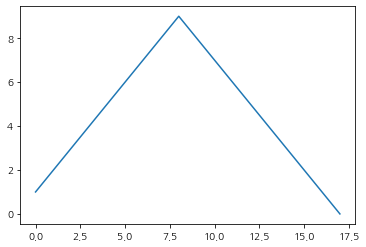

In [134]:
plt.figure
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

간단한 그래프를 그려 보았다. 다음은 numpy를 이용해서 sin을 만들고 이것을 그려보자.

In [135]:
import numpy as np
t = np.arange(0,12,0.01)
y = np.sin(t)

np.arrange 명령은 0부터 12까지 0.01의 간격으로 데이터를 만들고 그 리스트를 np.sin에 입력하면 sin 값이 나타난다. 이 부분을 유심히보자. 우리는 지금 t라는 시간 혹은 그래프상에서 x축을 의미하난 데이터를 0부터 12까지 만들고 그냥 사인함수(np.sin)에 입력해서 그 출력을 y로 저장하였다. t는 값을 하나만 가진 변수가 아니다. 약 1200개 정도의 값을 가진 일종의 배열이다. 그것을 반복문 없이 그냥 한 줄로 처리하는 것이다.

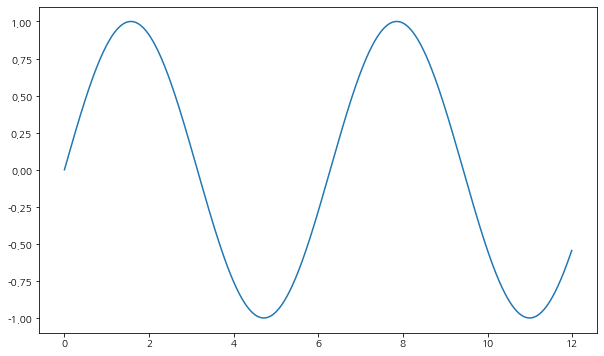

In [136]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.show()

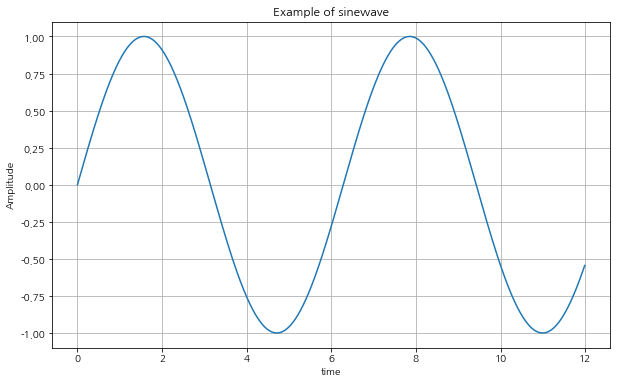

In [137]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

xlable로 x축 라벨을, ylabel로 y축 라벨을, title 명령으로 제목을 정하고, 격자무니는 grid() 명령으로 만들 수 있다.

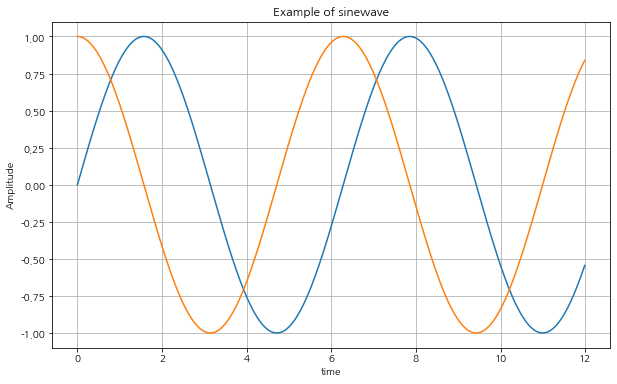

In [138]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t))
plt.plot(t,np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

또 plot 명령을 두개 넣어서 한 화면에 그래프를 두 개 만들 수 있다. 여기에 범례(legend)를 추가하고 싶으면 plot을 그릴 때 label 옵션으로 텍스트를 잡아주고, plt.legend()라는 명령을 주면 된다.

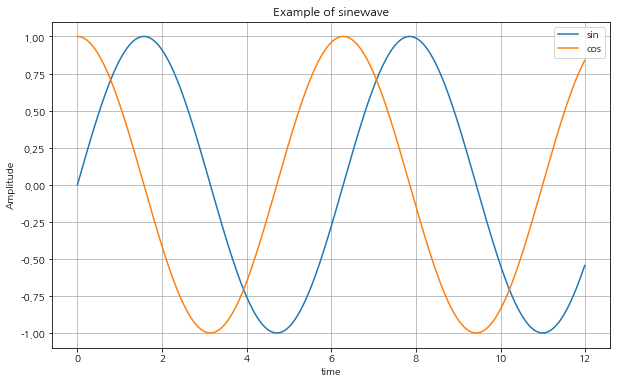

In [139]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t),label='sin')
plt.plot(t,np.cos(t),label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

또한 lw 옵션으로 선의 굵기를 지정할 수 있으며, color 옵션으로 색상을 지정할 수 있다.

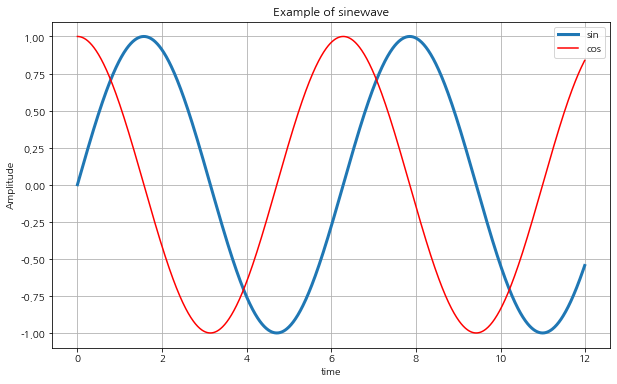

In [140]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t), lw=3, label='sin')
plt.plot(t,np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

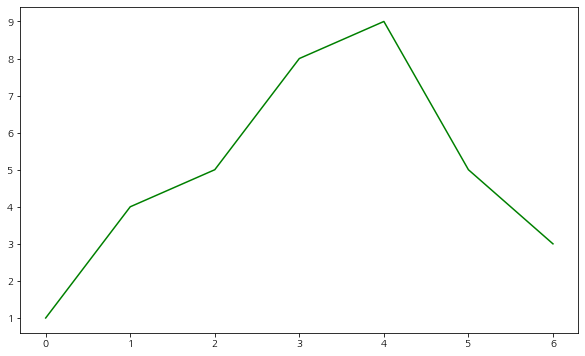

In [141]:
t = [0,1,2,3,4,5,6]
y = [1,4,5,8,9,5,3]
plt.figure(figsize=(10,6))
plt.plot(t,y,color='green')
plt.show()

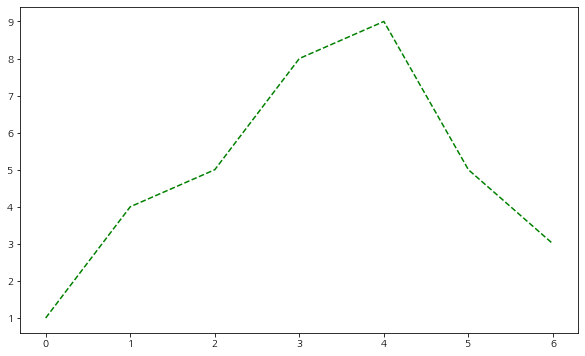

In [142]:
t = [0,1,2,3,4,5,6]
y = [1,4,5,8,9,5,3]
plt.figure(figsize=(10,6))
plt.plot(t,y,color='green', linestyle='dashed')
plt.show()

linestyle = 'dashed' 옵션으로 선 스타일을 지정할 수 있다.

<function matplotlib.pyplot.show(close=None, block=None)>

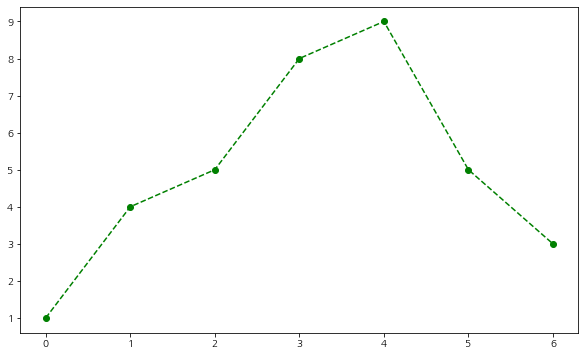

In [143]:
plt.figure(figsize=(10,6))
plt.plot(t,y,color='green', linestyle='dashed', marker='o')
plt.show

marker 옵션으로 데이터가 존재하는 곳에 마킹할 수 있다. 여기에 markerfacecolor 옵션과 marksize 옵션으로 marksize 옵션으로 마커의 크기와 색상을 지정할 수 있다.

<function matplotlib.pyplot.show(close=None, block=None)>

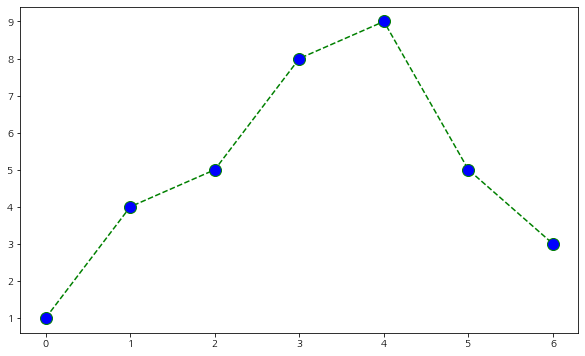

In [144]:
plt.figure(figsize=(10,6))
plt.plot(t,y,color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12)
plt.show

선을 그리는 plot 명령 외에 scatter 명령도 있다.


In [145]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

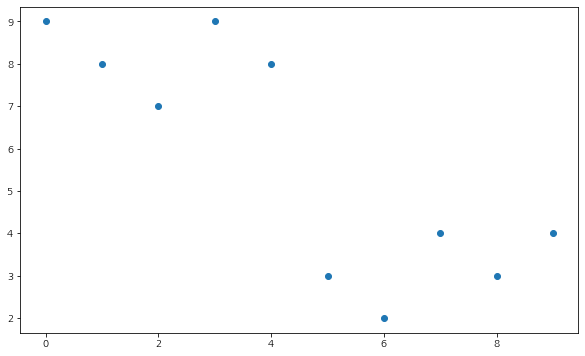

In [146]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

여기에 marker를 지정할 수 있다.

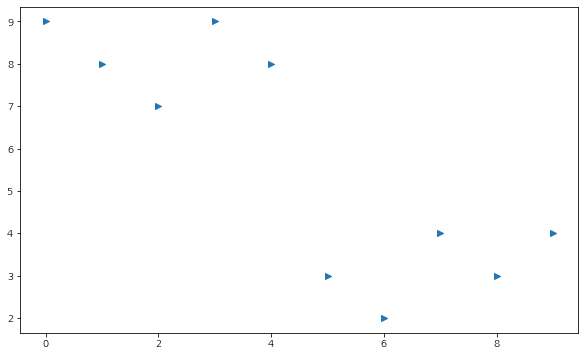

In [147]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
plt.show()

그리고 x축 값인 t에 따라 색상을 바꾸는 color map을 지정할 수 있다. 이 때 s옵션은 마커의 크기이다.

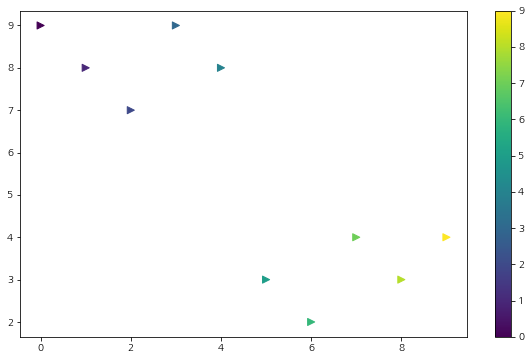

In [148]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s=50, c=colormap,marker='>')
plt.colorbar()
plt.show()

numpy의 랜덤변수 함수를 이용해서 데이터 세개를 만들어 보자. 이때 loc 옵션으로 평균값과 scale 옵션으로 표준편차를 지정한다.

In [149]:
s1 = np.random.normal(loc=0,scale=1,size=1000)
s2 = np.random.normal(loc=5,scale=0.5,size=1000)
s3 = np.random.normal(loc=10,scale=2,size=1000)

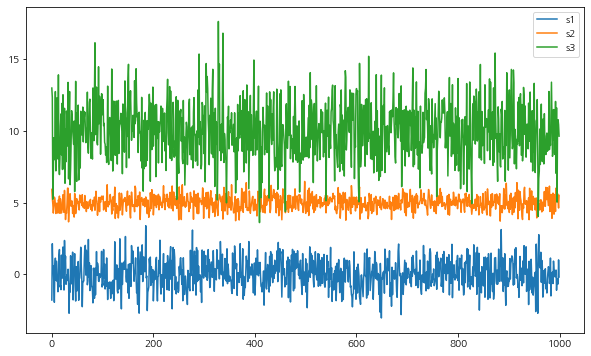

In [150]:
plt.figure(figsize=(10,6))
plt.plot(s1,label='s1')
plt.plot(s2,label='s2')
plt.plot(s3,label='s3')
plt.legend()
plt.show()

위와 같이 나온다. 이것을 boxplot으로 표현할 수 있다. boxplot의 정의는 조금 복잡하니 다시 언급하도록 하겠다.


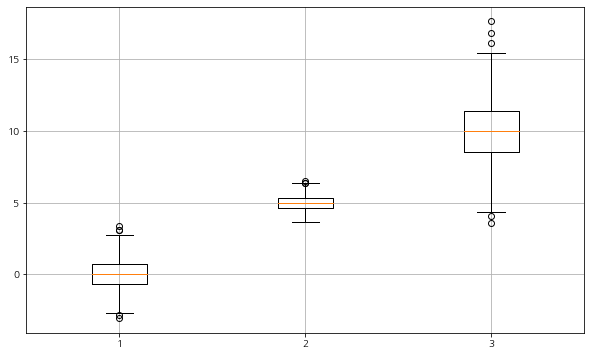

In [151]:
plt.figure(figsize=(10,6))
plt.boxplot((s1,s2,s3))
plt.grid()
plt.show()

## 1-8 CCTV 현황 그래프로 분석하기



이제는 CCTV 현황을 그래프로 그려보자. 하지만 한 가지 문제가 있는데 바로 한글 문제이다. matplotlib이 기본으로 가진 폰트는 한글을 지원하지 않기 때문에 matplotlib의 폰트를 변경할 필요가 있다.


In [152]:
# import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [153]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


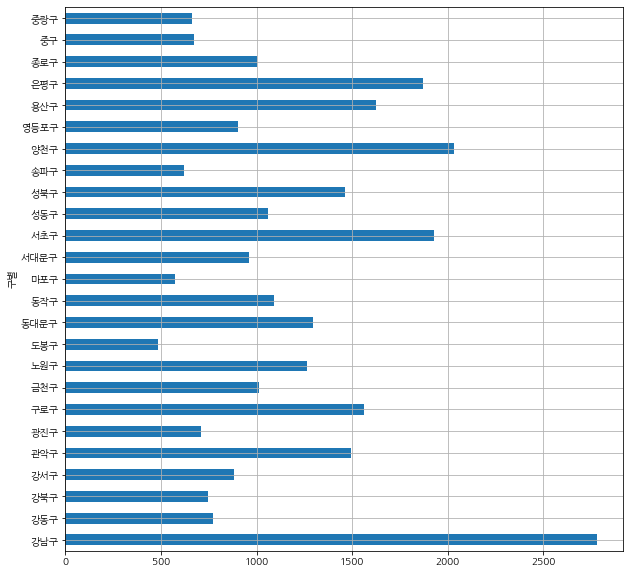

In [154]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

pandas 데이터 뒤에 plot 명령을 붙이면 바로 그려준다.

NameError: name 'fm' is not defined

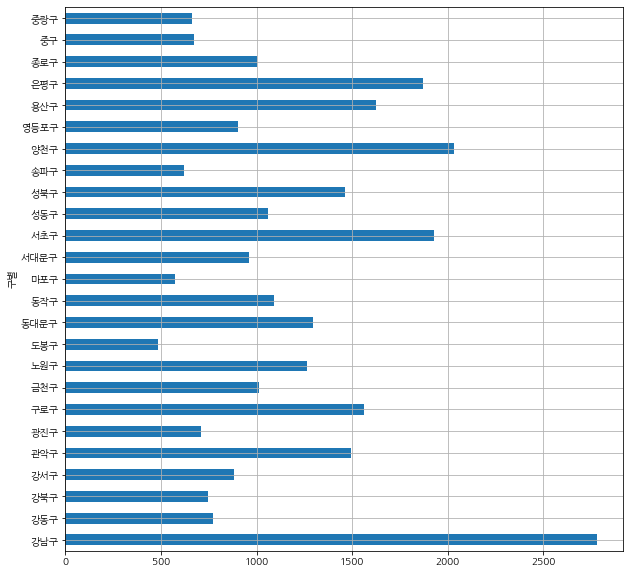

In [155]:
data_result['소계'].plot(kind='barh',grid=True, figsize=(10,10))

fontprop = fm.FontProperties(fname=path, size=18)

plt.show()

여기서 kind='barh'로 지정해서 수평바(bar)로 그리도록 했다. grid=True 로 grid를 그리라 했고 figsize로 그림 크기도 지정했다. 하지만 figsize를 지정했어도 표현되는 곳이 웹 브라우저이기 때문에 항상 그 크기를 유지하는 것은 아닐 수 있다. 유저가 창의 크기를 줄이거나 하면 변하게 될 것이다. 위 그림은 큰 의미를 찾기 어렵다. 사실 수평바 그래프는 데이터가 정렬되어 있을 때 좀 더 보기 좋다.

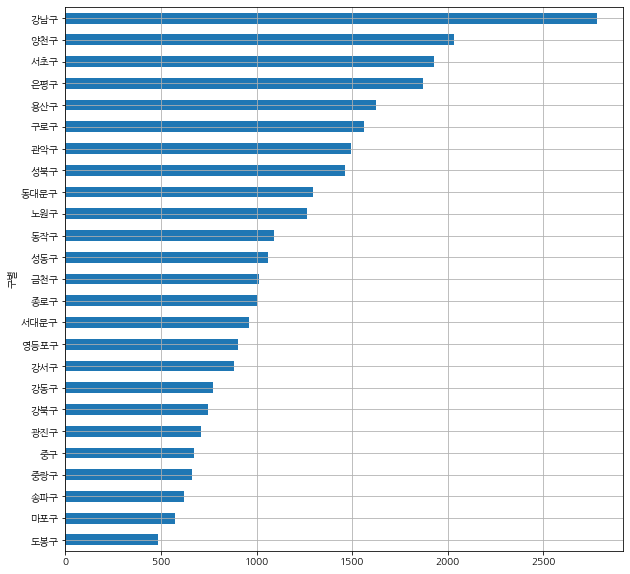

In [156]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

plt.show()

이제 보니 CCTV 개수에서는 강남구가 월등하다는 것을 알 수 있다. 그 뒤를 이어서 양천구, 서초구, 은평구가 꽤 많은 CCTV가 설치 됐다는 것을 알 수 있다. 여기에 인구대비 CCTV 비율을 계산해서 정렬하고 그려보자.

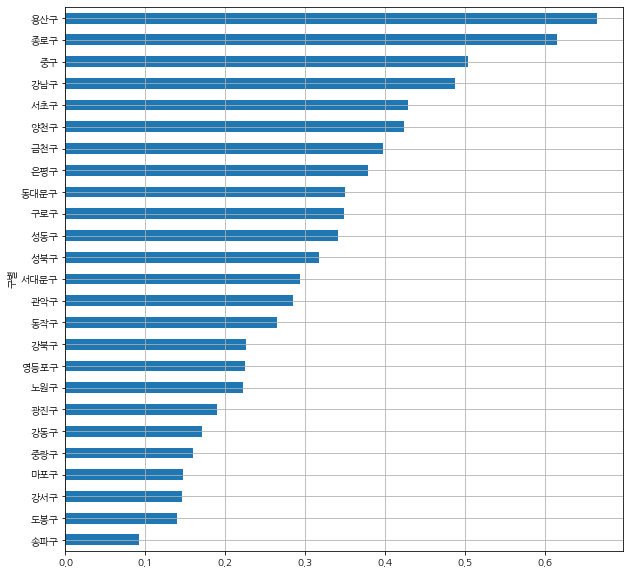

In [157]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.show()

위와 같은 그래프를 볼 수 있다. 인구 대비 CCTV 수를 보니 이번에는 용산구와 종로구가 월등히 높다. 그런데 송파구는 인구 대비로 봐도 CCTV 비율이 낮다. 이번엔 scatter 함수를 사용해보자. 그리고 s=50로 마커의 크기를 잡고 그려보자.

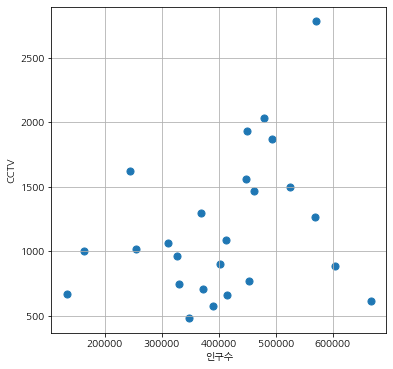

In [158]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

이제 위 데이터를 대표하는 직선을 하나 그리려고 한다. 

In [159]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [160]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

여기서 numpy의 polyfit 명령으로 손쉽게 직선을 만들 수 있다. 그리고 이를 그리기 위해 x축과 y축 데이터를 얻어야 하는데 x축 데이터는 numpy의 linspace로 만들고 y축은 poly1d로 만들 수 있다.


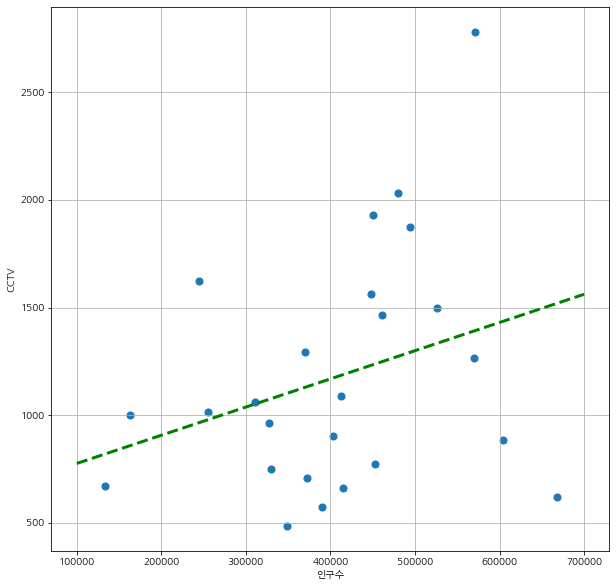

In [161]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

여기서 두가지 장치를 넣고싶다. 하나는 직선이 이 전체 데이터의 대표 값 역할을 한다면, 즉 인구수가 300000일 때는 CCTV는 1100 정도여야 한다는 개념을 이야기 하는 거라면 그 경향에서 멀리 있는 구는 이름이 같이 나타나도록 하고 싶다는 것과 직선에서 멀어질수록 다른 색을 나타내도록 하고 싶다는 것이다. 그래서 오차를 계산할 수 있는 코드를 만들고 오차가 큰 순으로 데이터를 정렬해서 다시 저장해보자.

In [162]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


이제 텍스트와 color map을 입히자.

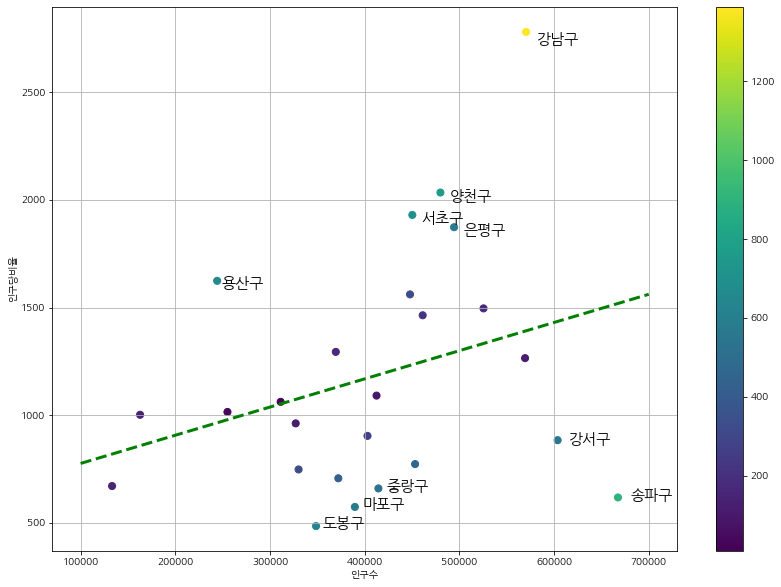

In [163]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

출처 : 파이썬으로 데이터 주무르기